In [1]:
import numpy as np
import h5py, os
import matplotlib.pyplot as plt

from info_measures import dataset_generators as dg

from ecog.signal_processing import resample

aaaaaaaaaaaaaaaaaaaaaaaaa


In [2]:
files, = os.walk('/data/NWB/R32/')
folder = files[0]
files = files[2]
files = [f for f in files if 'wRaw' not in f]
files = ['R32_B6.nwb']

In [3]:
for fname in files:
    with h5py.File(os.path.join(folder, fname)) as f:
        X = np.squeeze(f['processing/preprocessed/Wvlt_4to1200_54band_CAR1/Wvlt_ECoG128/data'].value)
        st = f['processing/preprocessed/MUA/MUA_ECoG128/starting_time']
        rm = np.squeeze(f['stimulus/presentation/recorded_mark/data'].value)
        init_rate = st.attrs['rate']

In [4]:
X = resample(X, 200., 400., axis=0)

In [ ]:
def extract_baseline(X, mark):
    

In [6]:
mark_std = rm.std()
print(mark_std)

0.0048479


In [7]:
rm_ds = np.squeeze(resample(rm[np.newaxis], 200., 400.))
print(rm.shape, rm_ds.shape)

(25877,) (12939,)


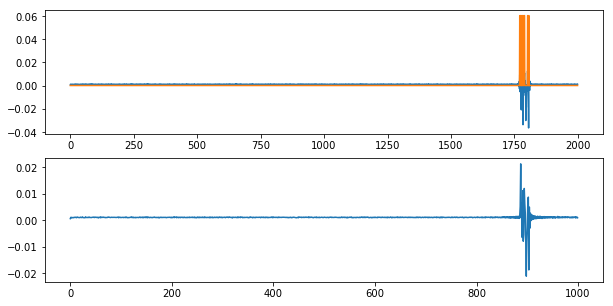

In [9]:
n_pts = 2000
f, (ax0, ax1) = plt.subplots(2, figsize=(10, 5))
ax0.plot(rm[:n_pts])
thresh = rm > mark_std
ax0.plot(thresh[:n_pts] * rm.max())
ax1.plot(rm_ds[:n_pts // 2])
plt.show()

In [36]:
x.shape

(25877, 128, 54)

In [2]:
resample?

In [13]:
x = f['processing/preprocessed/Wvlt_4to1200_54band_CAR1/Wvlt_ECoG128/data']
st = f['processing/preprocessed/MUA/MUA_ECoG128/starting_time']

In [5]:
x.shape

(585267, 128, 54)

In [14]:
list(st.attrs)

['rate', 'unit']

In [15]:
st.attrs['rate']

400.0

In [18]:
st.attrs['unit']

'Seconds'

In [31]:
f.visit(lambda name: print(name))

acquisition
acquisition/Raw
acquisition/Raw/ECoG128
acquisition/Raw/ECoG128/ECoG128
acquisition/Raw/ECoG128/data
acquisition/Raw/ECoG128/starting_time
acquisition/Raw/Poly32
acquisition/Raw/Poly32/Poly32
acquisition/Raw/Poly32/data
acquisition/Raw/Poly32/starting_time
analysis
epochs
epochs/epochs
epochs/timeseries_index
file_create_date
general
general/devices
general/devices/ECoG128
general/devices/Poly32
general/experiment_description
general/experimenter
general/extracellular_ephys
general/extracellular_ephys/ECoG128_electrodes
general/extracellular_ephys/Poly32
general/extracellular_ephys/electrodes
general/institution
general/lab
general/notes
general/pharmacology
general/session_id
general/surgery
identifier
processing
processing/preprocessed
processing/preprocessed/MUA
processing/preprocessed/MUA/MUA_ECoG128
processing/preprocessed/MUA/MUA_ECoG128/data
processing/preprocessed/MUA/MUA_ECoG128/starting_time
processing/preprocessed/MUA/MUA_Poly32
processing/preprocessed/MUA/MUA_Po